## WeatherPy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

In [5]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

## Perfrom API Calls

In [6]:
print("Start Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Next...")

print("-----------------------------")
print("Data Complete")
print("-----------------------------")

Start Data Retrieval 
-----------------------------
Record 1 of Set 1 : torbay
Record 2 of Set 1 : vaini
Record 3 of Set 1 : leningradskiy
Record 4 of Set 1 : puerto ayora
Record 5 of Set 1 : georgetown
Record 6 of Set 1 : mahebourg
Record 7 of Set 1 : hermanus
Record 8 of Set 1 : adre
Record 9 of Set 1 : rennes
Record 10 of Set 1 : lamar
City not found. Next...
Record 11 of Set 1 : narsaq
Record 12 of Set 1 : alghero
Record 13 of Set 1 : nantong
Record 14 of Set 1 : atuona
Record 15 of Set 1 : atambua
Record 16 of Set 1 : hasaki
Record 17 of Set 1 : port alfred
Record 18 of Set 1 : kavieng
Record 19 of Set 1 : pangnirtung
Record 20 of Set 1 : bulawayo
Record 21 of Set 1 : salalah
Record 22 of Set 1 : churapcha
Record 23 of Set 1 : upernavik
Record 24 of Set 1 : gasa
Record 25 of Set 1 : ust-kulom
Record 26 of Set 1 : batagay
Record 27 of Set 1 : jining
Record 28 of Set 1 : ketchikan
Record 29 of Set 1 : rikitea
Record 30 of Set 1 : chuy
Record 31 of Set 1 : quatre cocos
Record 32 of S

Record 3 of Set 6 : namuac
Record 4 of Set 6 : maragogi
City not found. Next...
Record 5 of Set 6 : presidencia roque saenz pena
Record 6 of Set 6 : mar del plata
Record 7 of Set 6 : bone
Record 8 of Set 6 : tuatapere
Record 9 of Set 6 : san patricio
Record 10 of Set 6 : vila franca do campo
Record 11 of Set 6 : fort wellington
Record 12 of Set 6 : bathsheba
Record 13 of Set 6 : kissidougou
Record 14 of Set 6 : susanville
Record 15 of Set 6 : syracuse
Record 16 of Set 6 : plettenberg bay
City not found. Next...
Record 17 of Set 6 : kodiak
Record 18 of Set 6 : copiapo
City not found. Next...
City not found. Next...
Record 19 of Set 6 : salinas
Record 20 of Set 6 : manacapuru
Record 21 of Set 6 : sassandra
Record 22 of Set 6 : methoni
Record 23 of Set 6 : roald
Record 24 of Set 6 : alofi
Record 25 of Set 6 : olinda
Record 26 of Set 6 : aykhal
Record 27 of Set 6 : taltal
Record 28 of Set 6 : emerald
Record 29 of Set 6 : khatanga
Record 30 of Set 6 : san ramon
Record 31 of Set 6 : beringov

Record 1 of Set 11 : iracoubo
Record 2 of Set 11 : hudson bay
Record 3 of Set 11 : acapulco
Record 4 of Set 11 : holbeach
City not found. Next...
Record 5 of Set 11 : rio gallegos
Record 6 of Set 11 : araouane
Record 7 of Set 11 : quang ngai
Record 8 of Set 11 : manyana
Record 9 of Set 11 : lancaster
Record 10 of Set 11 : dunedin
Record 11 of Set 11 : buchanan
Record 12 of Set 11 : sapele
Record 13 of Set 11 : basar
Record 14 of Set 11 : lata
Record 15 of Set 11 : batemans bay
Record 16 of Set 11 : innisfail
Record 17 of Set 11 : sfantu gheorghe
Record 18 of Set 11 : muros
Record 19 of Set 11 : peniche
Record 20 of Set 11 : semey
Record 21 of Set 11 : mayumba
Record 22 of Set 11 : kodinsk
Record 23 of Set 11 : storm lake
Record 24 of Set 11 : kultuk
Record 25 of Set 11 : sanmenxia
Record 26 of Set 11 : shahr-e babak
Record 27 of Set 11 : altamira
City not found. Next...
Record 28 of Set 11 : santiago
Record 29 of Set 11 : shimoda
Record 30 of Set 11 : benguela
Record 31 of Set 11 : gre

## Create DataFrame

In [9]:
# Create data frame with data above
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [8]:
# Count 
weather_dict.count()

City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Lng           542
Max Temp      542
Wind Speed    542
dtype: int64

In [10]:
#Data Frame
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Torbay,20,CA,1619033614,57,47.6666,-52.7314,51.01,18.41
1,Vaini,40,TO,1619033812,94,-21.2000,-175.2000,73.40,3.44
2,Leningradskiy,33,RU,1619033812,67,69.3833,178.4167,27.19,5.97
3,Puerto Ayora,75,EC,1619033813,78,-0.7393,-90.3518,80.60,11.50
4,George Town,40,MY,1619033583,89,5.4112,100.3354,80.60,2.30
...,...,...,...,...,...,...,...,...,...
537,Santiago,40,CL,1619033924,35,-33.4569,-70.6483,75.00,8.05
538,Shimoda,5,JP,1619033959,79,34.6667,138.9500,52.00,3.00
539,Benguela,27,AO,1619033959,85,-12.5763,13.4055,81.09,4.72
540,Greifswald,1,DE,1619033959,68,54.1000,13.3833,44.01,1.01


In [15]:
# Save data into a csv file
weather_dict.to_csv("output_data/cities.csv", index = False)

## Plotting Data

### Latitude vs. Temperature

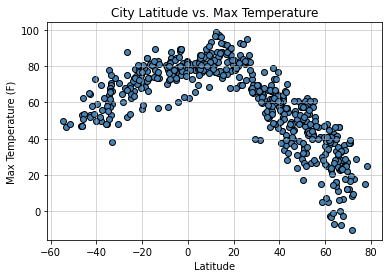

In [20]:
# Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set x axis
plt.xlabel("Latitude")

# Set y axis
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

Highest temperature is near the 15 latitude, and as latitude decreases the temperture decreases but not as much as when the latitdue increase.

### Latitude vs Humidity

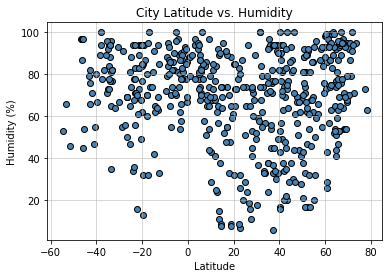

In [21]:
# Lat vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis
plt.xlabel("Latitude")

# Set y axis
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

As latidue get higher, the humidity get higher

### Latitude vs. Cloudiness

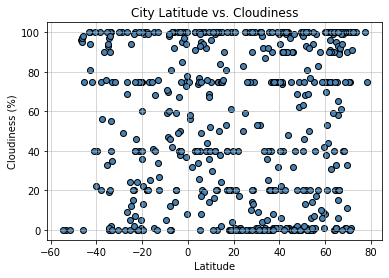

In [22]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis
plt.xlabel("Latitude")

# Set y axis
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

Cloudiness is widely spread across the latitdue for the cities selected

### Latitude vs. Wind Speed

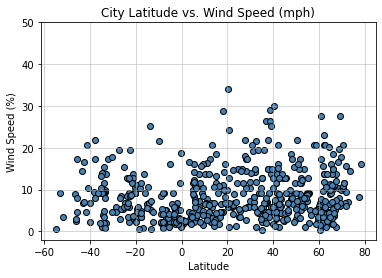

In [24]:
# Latitude vs. Wind Speed Plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Wind Speed (mph)")

# Set x axis
plt.xlabel("Latitude")

# Set y axis
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

Wind Speed is mainly below 25 MPH for the cities selected in the dateset.

## Linear Regression

In [25]:
# Set Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [28]:
# linear regression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# annotating 
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

### Northern Hemisphere - Temperature (F) vs. Latitude Linear Regression

The r-squared is : -0.88


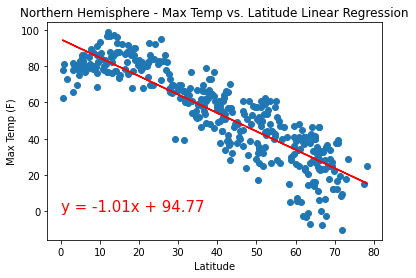

In [29]:
# linear aression
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# annotate
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The Northern Hemisphere has a negative correlation between the latitude and max temperature.

### Southern Hemisphere - Temperature vs. Latitude Linear Regression

The r-squared is : 0.75


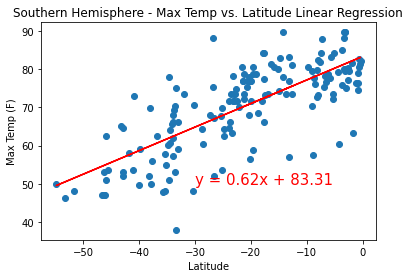

In [30]:
# Linear Regression
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# annotate
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a positive correlation between latitude and max temperature in the Souther Hemisphere.

### Nothern Hemisphere - Humidity (%) vs. Latitdue Linear Regression

The r-squared is : 0.12


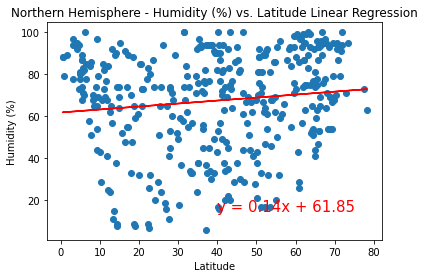

In [31]:
# Linear Regression
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# annotate
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a slight positive correlation between latitude and humidity in the Northern Hemisphere.

### Southern Hemisphere  - Humidity (%) vs. Latitdue Linear Regression

The r-squared is : 0.08


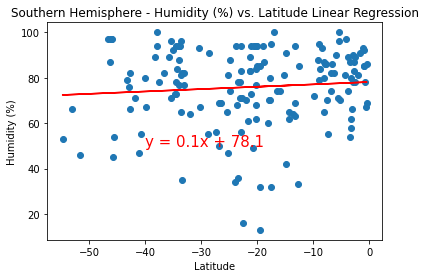

In [32]:
# linear Regression
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# annotate
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

The Humidity is less in the Souther Hemisphere, and there is also a slight positive correlation between latitude and humidity. 

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.07


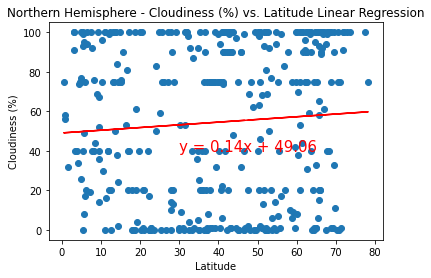

In [33]:
# Linear Regression
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# annotate
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a very slight positive correlation between cloudiness and latitude for the Northern Hemisphere, almost a  0 correlation.

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.07


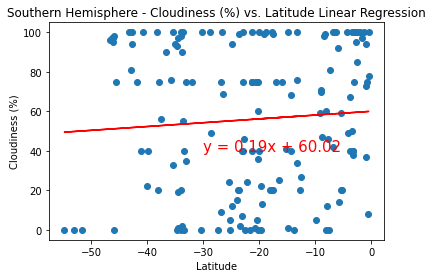

In [34]:
# linear regression
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# annotate
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a very slight positive correlation between cloudiness and latitude for the Southern Hemisphere, almost the same correlation as with the Nothern Hemisphere.

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.08


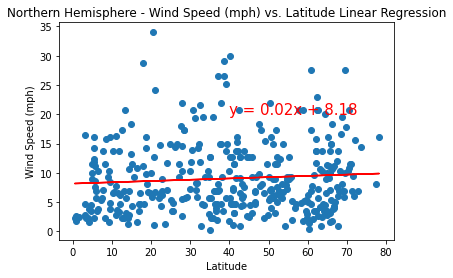

In [35]:
# linear regression
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# annotate
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There is almost no correlation between wind speed and latitude in the Nothern Hemisphere.

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.25


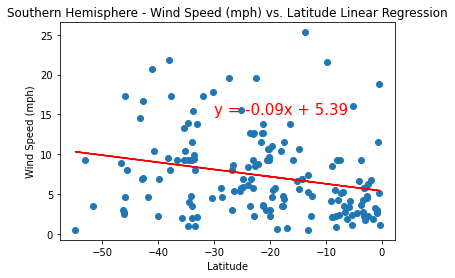

In [36]:
# Linear regression
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# annotate
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There is a negative correlation between wind speed and latitude in the Souther Hemisphere.